# Classification

When the labels are present (spam or not spam) it is called supervised learning. When there are no labels present it is called unsupervised learning.

* Unsupervised learning: Machine learning task of uncovering hidden patterns and structures from unlabeled data.
* Supervised learning: Several data points or samples described using predictor variables or features and a **target variable.**

The aim is to predict the target variable given the predictor variables.

If the target variable consists of categories the learning task is **classification**.

If the target variable is a continuous variable (price of a house) it is a **regression** task.

The goal is to either automate a time-consuming or expensive manual task (doctor diagnosis) or to make predictions about the future (costumer will click on an add or not.)

## Exploratory data analysis

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


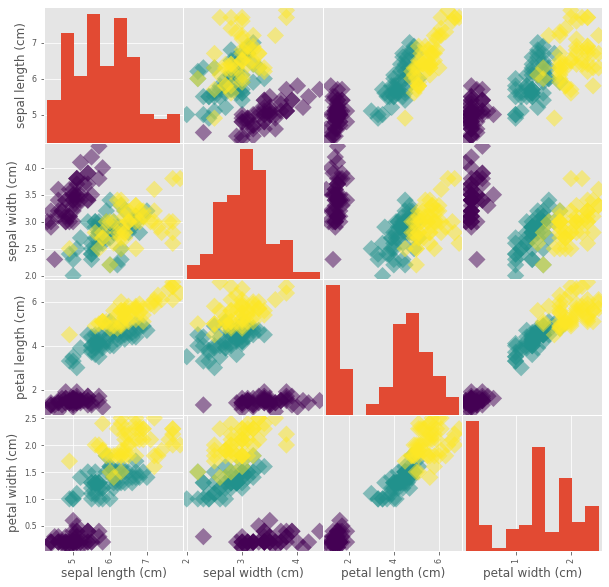

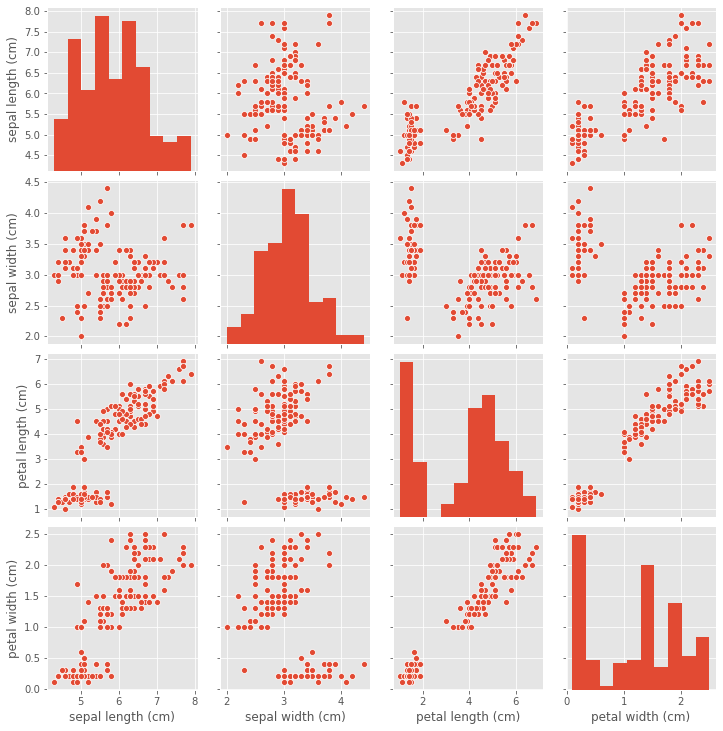

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
iris = datasets.load_iris()
print(type(iris))
print(iris.keys())
print(type(iris.data), type(iris.target))
print(iris.data.shape)
print(iris.target_names)
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())
pd.plotting.scatter_matrix(df, c=y, figsize=[10,10], s=150, marker="D")
sns.pairplot(df)
plt.show()

sns.pairplot seems slower than pd.plotting.scatter_matrix.

### Numerical EDA

In [2]:
# from urllib.request import urlretrieve
# url = "https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv"
# data = urlretrieve(url, "voting_records.csv")
df = pd.read_csv("voting_records.csv", header=None, names=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
df = df.replace("y", 1).replace("n", 0).replace("?", 1)

print(df.shape)
print(df.info())
print(df.describe())

(435, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null   

There are 16 predictor variables, or features, in this DataFrame since one of the columns contains the target data.

### Visual EDA

All the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

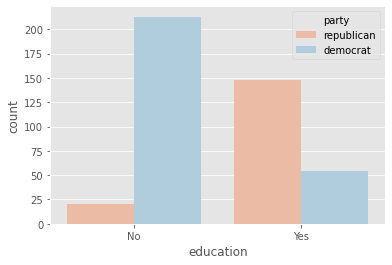

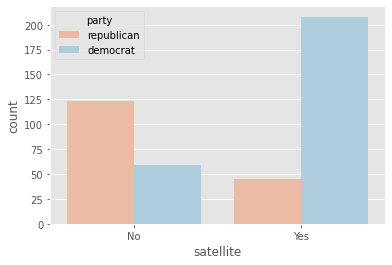

In [3]:
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

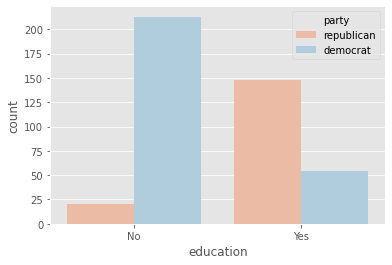

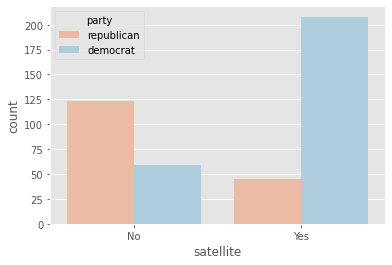

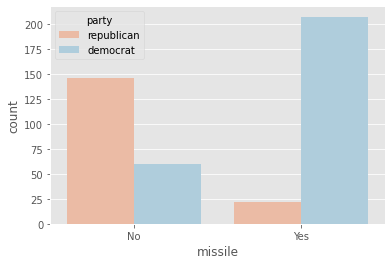

In [8]:
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## The classification challenge

### k-Nearest Neighbors: Fit

A classifier that takes unlabelled data as input and outputs a label. To construct this classifier, the type of the classifier needed to be chosen that learns from the already labeled data. The already labeled data is also called training data.

The idea of k-Nearest Neighbors is to predict the label of any data point by looking at the k closest labeled data points and getting them to vote on what label the unlabeled point should have.

KNN algorithm essentially creates a set of decision boundaries. To fit the data there should be no missing values in the data.

In [4]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1], 
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris["data"], iris["target"])
prediction = knn.predict(X_new)
print("Prediction: {}".format(iris.target_names[prediction]))


Prediction: ['versicolor' 'versicolor' 'setosa']


### k-Nearest Neighbors: Fit

In [5]:
X_new=pd.DataFrame(np.array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897, 0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426, 0.73799541]]))
y = df["party"].values
X = df.drop("party", axis=1).values
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
prediction = knn.predict(X_new)
print(prediction)

['democrat']


The use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

### k-Nearest Neighbors: Predict

In [6]:
y = df["party"]
X = df.drop("party", axis=1)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
y_pred = knn.predict(X)

print("The accuracy on the training set:",np.sum(df["party"] == y_pred) / len(df["party"]))

new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
knn.score(X, y)

The accuracy on the training set: 0.9517241379310345
Prediction: ['democrat']


0.9517241379310345

But How to be sure of its predictions? In other words, how to measure its performance?



## Measuring model performance

In classification accuracy is a commonly used metric. Accuracy is fraction of correct predictions. To measure the model's performance the labeled data can be splitted into two sets, a training set and a test set.

After spliting prediction can be made by using labeled test set and compare these predictions with the known labels, then accuracy can be computed.

Stratify:  if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

As K increases the desicion boundary gets smoother and less curvy so less complex. Generally complex models run the risk of being sensitive to noise, rather than reflecting general trends in the data. -> Overfitting.

If K increased even more an make the model even simpler then the model will perform less well on both test and training sets. -> Underfitting.



### The digits recognition dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


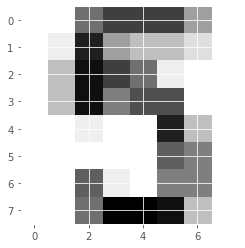

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [43]:
digits = datasets.load_digits()
print(digits.keys())
print(digits.images.shape)
print(digits.data.shape)
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()
print(digits["DESCR"])

### Train/Test Split + Fit/Predict/Accuracy

In [67]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9833333333333333

K-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy

### Overfitting and underfitting

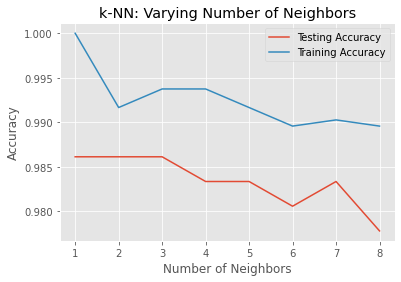

In [74]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title("k-NN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Using 8 neighbors or more seems to result in a simple model that underfits the data.